In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns
import numpy as np
sns.set()
sns.set_palette(sns.color_palette("viridis"))
sns.set_theme(style="white")
sns.set_style("whitegrid")
sns.set(font_scale=3)
sns.set(rc={'figure.figsize':(10, 10)})

In [2]:
simulation_a = pd.read_csv("../TP5/data/simulation_a.csv")
simulation_b = pd.read_csv("../TP5/data/simulation_b.csv")

In [3]:
simulation_a.head(), simulation_b.head()

(   exit_n   time  run
 0       0  0.250    0
 1       1  1.250    0
 2       2  1.875    0
 3       3  2.925    0
 4       4  3.050    0,
      N    d  run  exit_n   time
 0  200  1.2    0       0  1.375
 1  200  1.2    0       1  2.500
 2  200  1.2    0       2  2.900
 3  200  1.2    0       3  3.575
 4  200  1.2    0       4  3.650)

In [4]:
simulation_a.shape, simulation_b.shape

((200000, 3), (116000, 5))

In [5]:
simulation_a['exit_n'] = simulation_a['exit_n'] + 1
simulation_a.head()

,exit_n,time,run
0,1,0.250,0
1,2,1.250,0
2,3,1.875,0
3,4,2.925,0
4,5,3.050,0


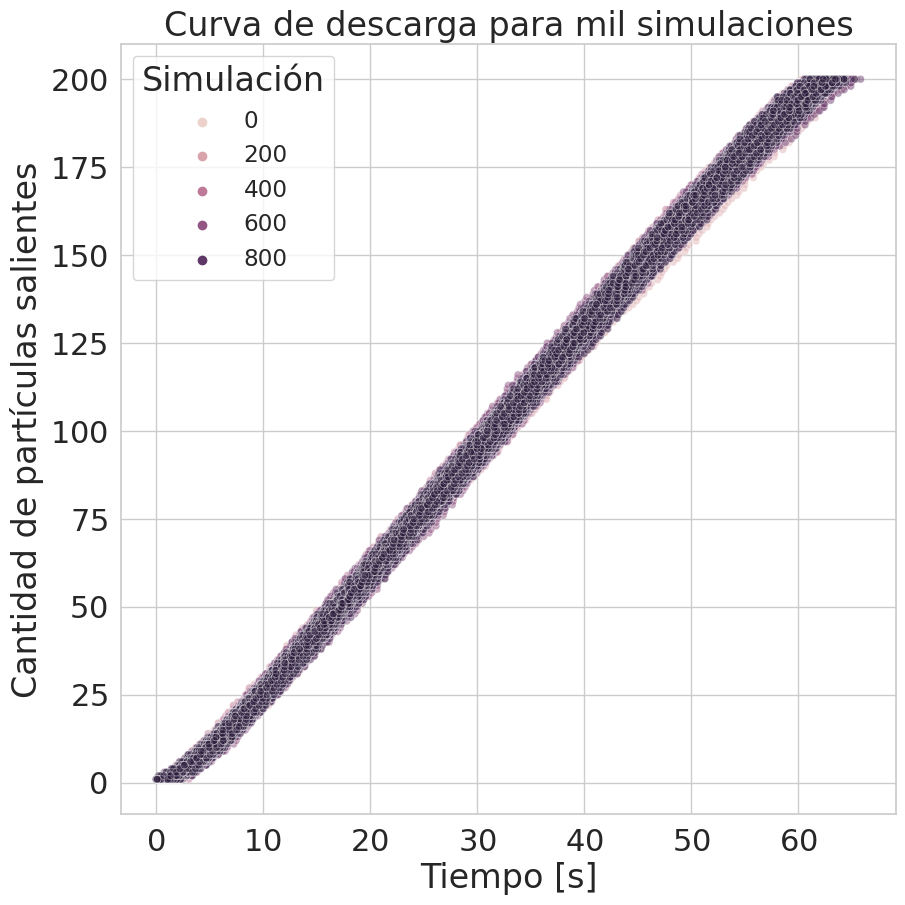

In [6]:
sns.set_palette(sns.color_palette("viridis"))
# Establecer el estilo y tamaño de fuente
sns.set(style="whitegrid", font_scale=2)

# Crear el gráfico de línea acumulativo con Seaborn
ax = sns.scatterplot(data=simulation_a, x='time', y='exit_n', hue='run', marker='o', s=30, alpha=0.5)

# Formato de notación científica para el eje y
ax.ticklabel_format(style='sci', useMathText=True)

# Personalizar el gráfico
plt.xlabel('Tiempo [s]')
plt.ylabel('Cantidad de partículas salientes')
plt.title('Curva de descarga para mil simulaciones')
plt.legend(title='Simulación', fontsize='x-small')

# plt.xlim(2, 10)  # Ajusta los límites según lo necesario

# Mostrar el gráfico
plt.show()


In [7]:
# Promediar los valores de time por exit_n
mean_simulation_a = simulation_a.groupby('exit_n')['time'].mean().reset_index()

# Agregar las columnas de min_time y max_time
mean_simulation_a['min_time'] = simulation_a.groupby('exit_n')['time'].min().values
mean_simulation_a['max_time'] = simulation_a.groupby('exit_n')['time'].max().values

mean_simulation_a

,exit_n,time,min_time,max_time
0,1,1.076775,0.050,3.100
1,2,1.739425,0.275,3.425
2,3,2.285100,0.800,3.875
3,4,2.752675,1.475,4.200
4,5,3.211550,1.900,4.725
...,...,...,...,...
195,196,60.767775,58.525,63.725
196,197,61.241625,59.025,64.275
197,198,61.691850,59.350,64.900
198,199,62.155375,59.900,64.950


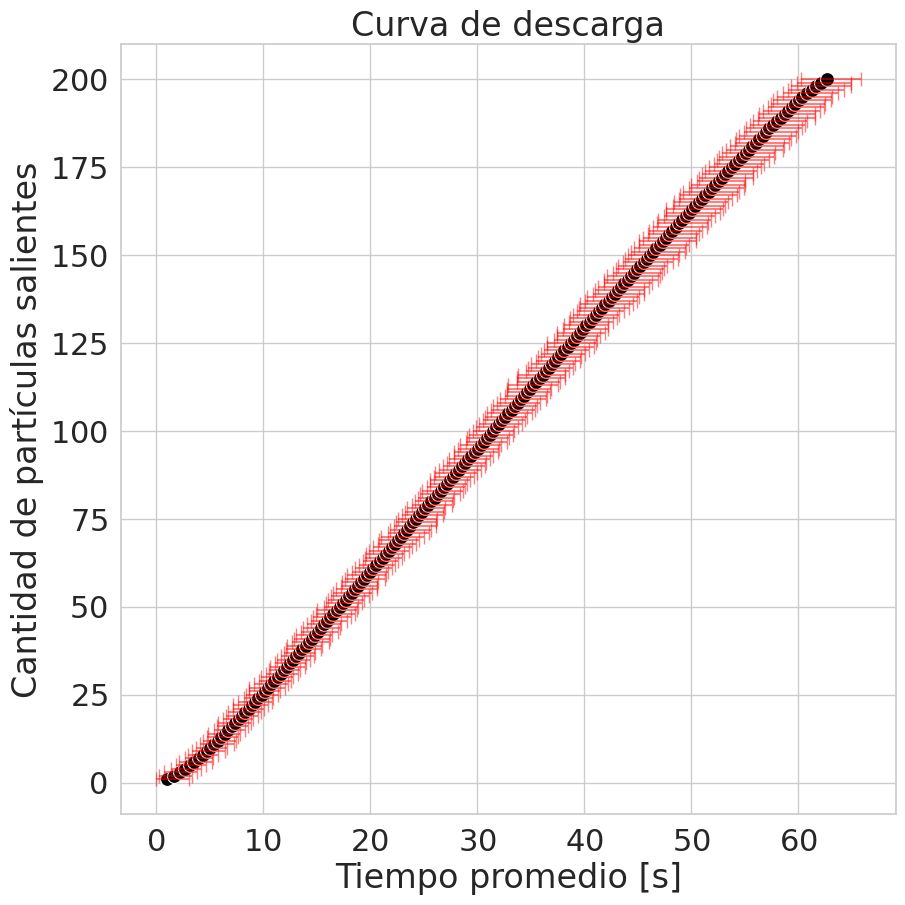

In [8]:
# Establecer el estilo y tamaño de fuente
sns.set(style="whitegrid", font_scale=2)

sns.set_palette(sns.color_palette("viridis"))

# Crear el scatterplot con barras de error
plt.errorbar(mean_simulation_a['time'], mean_simulation_a['exit_n'], xerr=[mean_simulation_a['time'] - mean_simulation_a['min_time'], mean_simulation_a['max_time'] - mean_simulation_a['time']], fmt='none', capsize=5, color='red', alpha=0.5)
ax = sns.scatterplot(data=mean_simulation_a, y='exit_n', x='time', marker='o', s=100, alpha=1, color='black')


# Formato de notación científica para el eje y
ax.ticklabel_format(style='sci', useMathText=True)

# Etiquetas y título del gráfico
plt.ylabel('Cantidad de partículas salientes')
plt.xlabel('Tiempo promedio [s]')
plt.title('Curva de descarga')

# Mostrar el gráfico
plt.show()


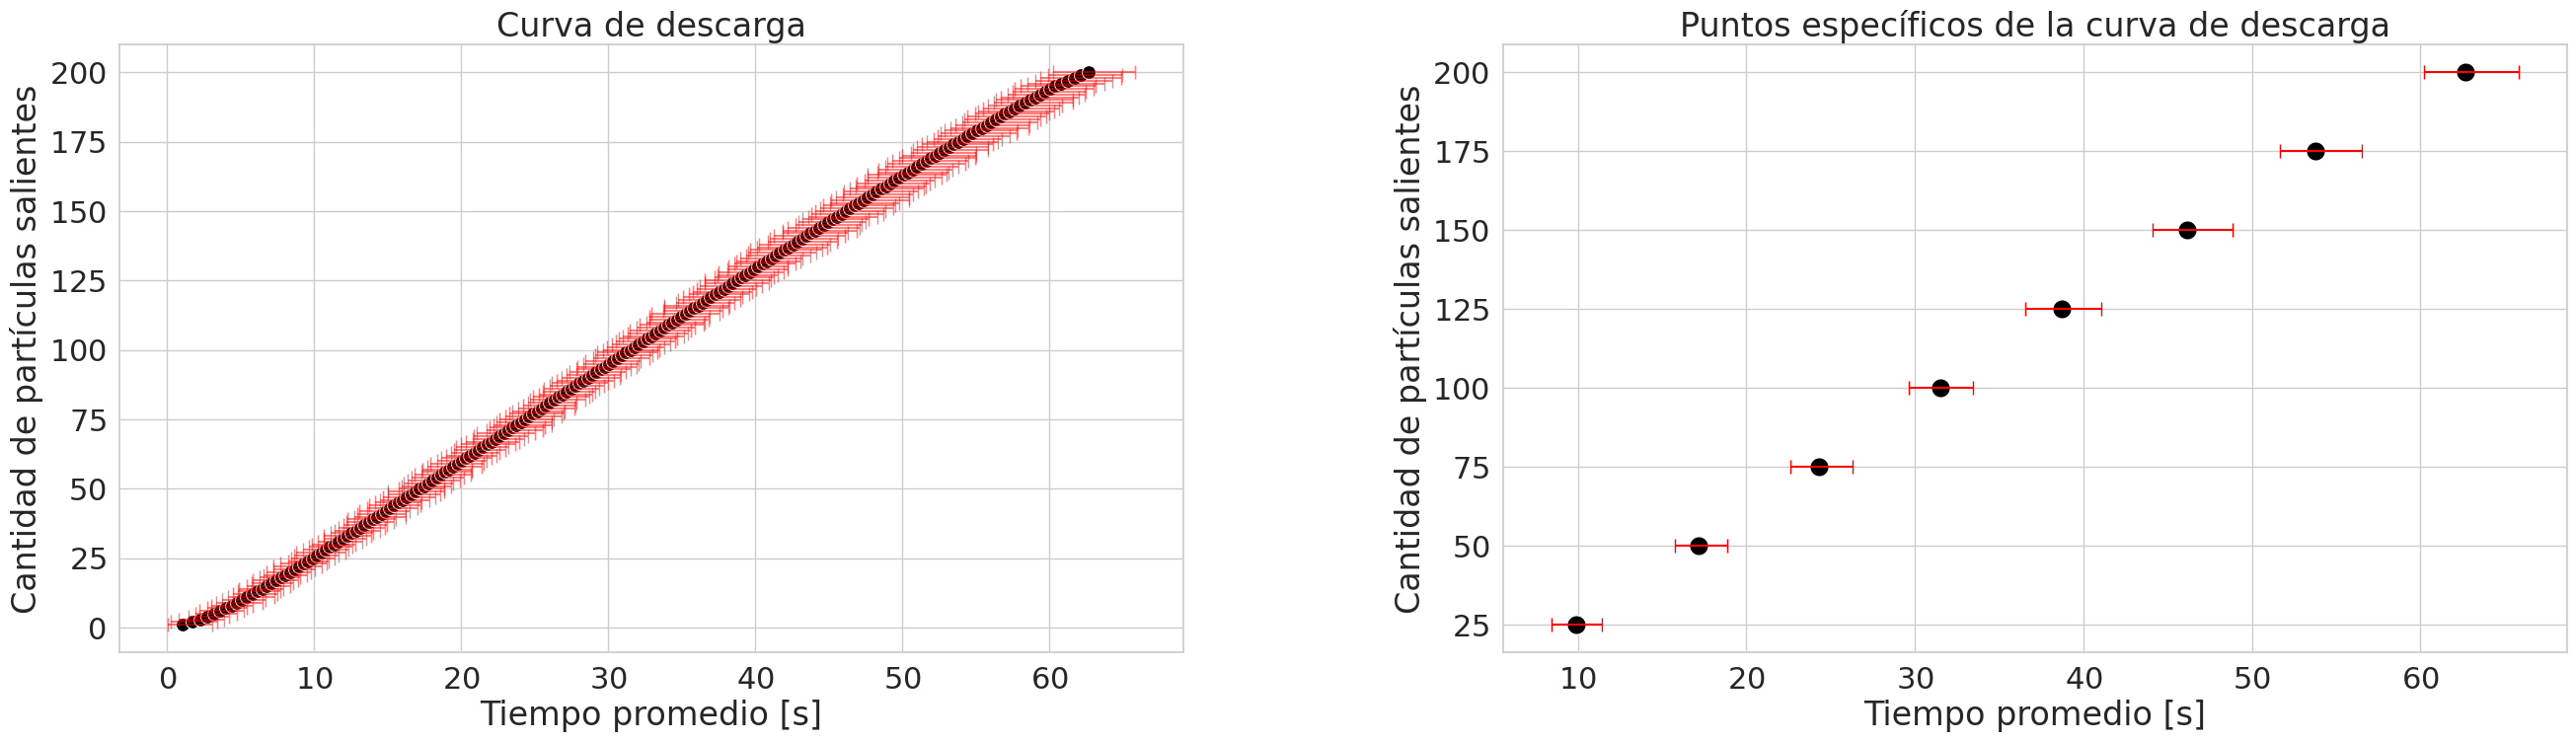

In [9]:
from matplotlib.gridspec import GridSpec

# Establecer el estilo y tamaño de fuente
sns.set(style="whitegrid", font_scale=2)
sns.set_palette(sns.color_palette("viridis"))

# Crear la figura y la especificación de la cuadrícula
fig = plt.figure(figsize=(32, 8))
grid = GridSpec(1, 2, width_ratios=[3, 3])

# Gráfico existente
ax1 = fig.add_subplot(grid[0])
plt.errorbar(mean_simulation_a['time'], mean_simulation_a['exit_n'], xerr=[mean_simulation_a['time'] - mean_simulation_a['min_time'], mean_simulation_a['max_time'] - mean_simulation_a['time']], fmt='none', capsize=5, color='red', alpha=0.5)
sns.scatterplot(data=mean_simulation_a, y='exit_n', x='time', marker='o', s=100, alpha=1, color='black')
ax1.ticklabel_format(style='sci', useMathText=True)
plt.ylabel('Cantidad de partículas salientes')
plt.xlabel('Tiempo promedio [s]')
plt.title('Curva de descarga')

# Nuevo gráfico al lado
ax2 = fig.add_subplot(grid[1])
exit_n_values = [25, 50, 75, 100, 125, 150, 175, 200]
filtered_data = mean_simulation_a[mean_simulation_a['exit_n'].isin(exit_n_values)]
sns.scatterplot(data=filtered_data, y='exit_n', x='time', marker='o', s=200, alpha=1, color='black')
plt.errorbar(filtered_data['time'], filtered_data['exit_n'], xerr=[filtered_data['time'] - filtered_data['min_time'], filtered_data['max_time'] - filtered_data['time']], fmt='none', capsize=5, color='red', alpha=1)
ax2.ticklabel_format(style='sci', useMathText=True)
plt.ylabel('Cantidad de partículas salientes')
plt.xlabel('Tiempo promedio [s]')
plt.title('Puntos específicos de la curva de descarga')

# Ajustar la disposición de los subgráficos
grid.update(wspace=0.3)
# plt.tight_layout(hspace=0.5)

# Mostrar el gráfico
plt.show()


In [10]:
simulation_a.head()

,exit_n,time,run
0,1,0.250,0
1,2,1.250,0
2,3,1.875,0
3,4,2.925,0
4,5,3.050,0


In [11]:
# Crear una lista para almacenar los DataFrames
lista_dataframes = []

# Obtener los valores únicos de 'run'
corridas = simulation_a['run'].unique()

# Iterar sobre cada corrida y crear un DataFrame separado
for corrida in corridas:
    # Filtrar el DataFrame original por la corrida actual
    df_corrida = simulation_a[simulation_a['run'] == corrida].copy()
    # Agregar el DataFrame de la corrida a la lista
    df_corrida.drop('run', axis=1, inplace=True)
    lista_dataframes.append(df_corrida)
    
#lista_dataframes

In [12]:
histograms = pd.DataFrame(columns = ['run', 'time', 'count'])
for (time, run), simulation in simulation_a.groupby(by=lambda idx:(int(simulation_a['time'].loc[idx] / 1) * 1, simulation_a['run'].loc[idx])):
    histograms.loc[-1] = [run, time, len(simulation)]
    histograms.index = histograms.index + 1

histograms.loc[-1] = [1560, 65, 0]
histograms.index = histograms.index + 1

histograms.head()

,run,time,count
62492,0,0,1
62491,2,0,1
62490,3,0,1
62489,5,0,1
62488,6,0,1


Text(0.5, 1.0, 'Caudal promedio en función del tiempo')

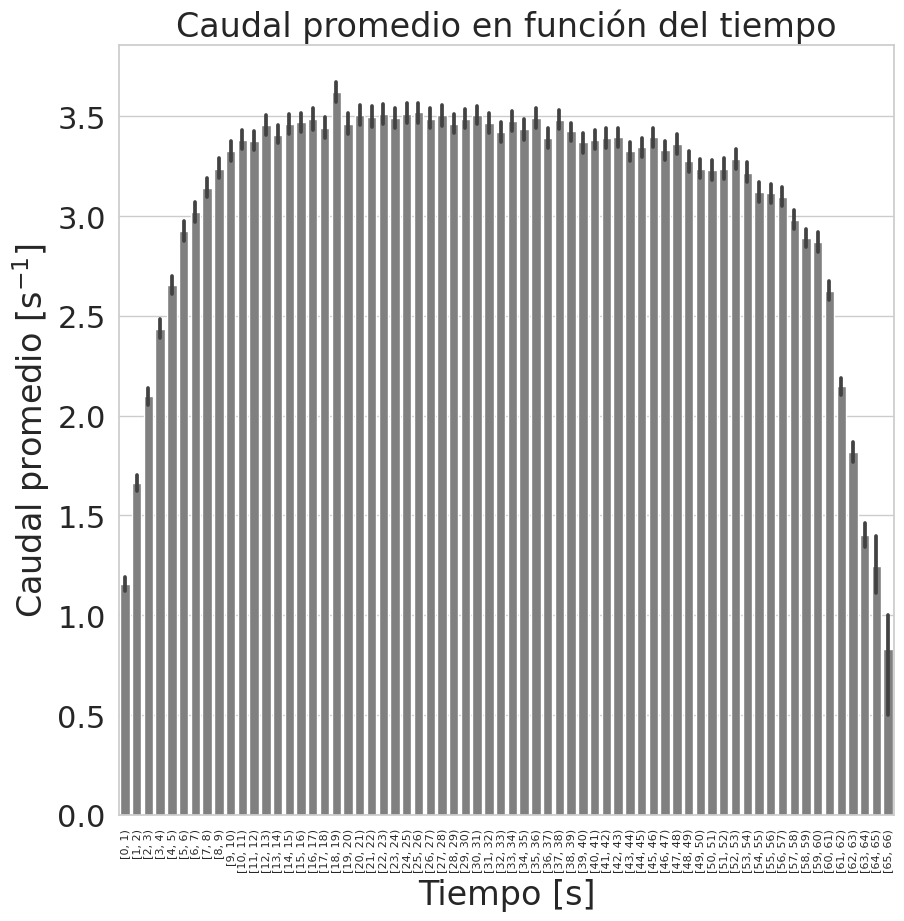

In [13]:
ax = sns.barplot(data=histograms, y="count", x="time", color='gray')
ax.set_xticklabels([f'[{start.get_text()}, {int(start.get_text()) + 1})' for start in ax.get_xticklabels()], rotation=90)
ax.tick_params(axis='x', labelsize=8)

plt.ylabel('Caudal promedio [s$^{-1}$]')
plt.xlabel('Tiempo [s]')
plt.title('Caudal promedio en función del tiempo')

In [14]:
mean_simulation_a

,exit_n,time,min_time,max_time
0,1,1.076775,0.050,3.100
1,2,1.739425,0.275,3.425
2,3,2.285100,0.800,3.875
3,4,2.752675,1.475,4.200
4,5,3.211550,1.900,4.725
...,...,...,...,...
195,196,60.767775,58.525,63.725
196,197,61.241625,59.025,64.275
197,198,61.691850,59.350,64.900
198,199,62.155375,59.900,64.950


In [15]:
simulation_b.head(), simulation_b.shape

(     N    d  run  exit_n   time
 0  200  1.2    0       0  1.375
 1  200  1.2    0       1  2.500
 2  200  1.2    0       2  2.900
 3  200  1.2    0       3  3.575
 4  200  1.2    0       4  3.650,
 (116000, 5))

In [16]:
simulation_b["exit_n"] = simulation_b["exit_n"] + 1 
simulation_b

,N,d,run,exit_n,time
0,200,1.2,0,1,1.375
1,200,1.2,0,2,2.500
2,200,1.2,0,3,2.900
3,200,1.2,0,4,3.575
4,200,1.2,0,5,3.650
...,...,...,...,...,...
115995,380,3.0,99,376,51.100
115996,380,3.0,99,377,51.600
115997,380,3.0,99,378,52.050
115998,380,3.0,99,379,52.125


In [17]:
# Promediar los valores de time por exit_n
mean_simulation_b = simulation_b.groupby(['N', 'd', 'exit_n'])['time'].mean().reset_index()

# Agregar las columnas de min_time y max_time
mean_simulation_b['min_time'] = simulation_b.groupby(['N', 'd', 'exit_n'])['time'].min().values
mean_simulation_b['max_time'] = simulation_b.groupby(['N', 'd', 'exit_n'])['time'].max().values

mean_simulation_b

,N,d,exit_n,time,min_time,max_time
0,200,1.2,1,1.14275,0.125,3.250
1,200,1.2,2,1.76800,0.375,3.300
2,200,1.2,3,2.30150,1.250,3.975
3,200,1.2,4,2.73150,1.600,4.400
4,200,1.2,5,3.20975,2.100,4.650
...,...,...,...,...,...,...
1155,380,3.0,376,51.50925,50.175,53.375
1156,380,3.0,377,51.89900,50.500,53.900
1157,380,3.0,378,52.33375,51.025,54.325
1158,380,3.0,379,52.97400,51.250,55.075


In [18]:
# Calcular el delta de la cantidad de partículas salientes y el delta de tiempo (dt)
mean_simulation_b.at[1090, 'time'] = 42.200
mean_simulation_b['delta_exit_n'] = mean_simulation_b['exit_n'].diff()
mean_simulation_b['dt'] = mean_simulation_b['time'].diff().replace(0, 0.0001)

# Calcular el caudal (Q)
mean_simulation_b['Q'] = mean_simulation_b['delta_exit_n'] / mean_simulation_b['dt']
mean_simulation_b['Q_variation'] = mean_simulation_b['Q'].pct_change()
mean_simulation_b

,N,d,exit_n,time,min_time,max_time,delta_exit_n,dt,Q,Q_variation
0,200,1.2,1,1.14275,0.125,3.250,NaN,NaN,NaN,NaN
1,200,1.2,2,1.76800,0.375,3.300,1.0,0.62525,1.599360,NaN
2,200,1.2,3,2.30150,1.250,3.975,1.0,0.53350,1.874414,0.171978
3,200,1.2,4,2.73150,1.600,4.400,1.0,0.43000,2.325581,0.240698
4,200,1.2,5,3.20975,2.100,4.650,1.0,0.47825,2.090957,-0.100889
...,...,...,...,...,...,...,...,...,...,...
1155,380,3.0,376,51.50925,50.175,53.375,1.0,0.34800,2.873563,-0.026580
1156,380,3.0,377,51.89900,50.500,53.900,1.0,0.38975,2.565747,-0.107120
1157,380,3.0,378,52.33375,51.025,54.325,1.0,0.43475,2.300173,-0.103508
1158,380,3.0,379,52.97400,51.250,55.075,1.0,0.64025,1.561890,-0.320968


In [19]:
# Encontrar los rangos de tiempos donde el caudal se mantiene constante
constant_Q_ranges = []
current_range_start = None

for index, row in mean_simulation_b.iterrows():
    if current_range_start is None:
        current_range_start = row['time']
    elif abs(row['Q_variation']) < 1e-3:  # Variación relativa mínima para considerar constante
        if current_range_start != row['time']:
            constant_Q_ranges.append((current_range_start, row['time']))
        current_range_start = None

# Crear la columna "is_stationary" e inicializarla como False
mean_simulation_b['is_stationary'] = False
        
# Imprimir los rangos de tiempos donde el caudal se mantiene constante
# Marcar las filas correspondientes a los rangos de tiempo donde el caudal es constante
for start, end in constant_Q_ranges:
    print(f"Caudal constante en el rango de tiempo [{start:.4f}, {end:.4f}]")
    mean_simulation_b.loc[(mean_simulation_b['time'] >= start) & (mean_simulation_b['time'] <= end), 'is_stationary'] = True

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
    
mean_simulation_b

,N,d,exit_n,time,min_time,max_time,delta_exit_n,dt,Q,Q_variation,is_stationary
0,200,1.2,1,1.14275,0.125,3.250,NaN,NaN,NaN,NaN,False
1,200,1.2,2,1.76800,0.375,3.300,1.0,0.62525,1.599360,NaN,False
2,200,1.2,3,2.30150,1.250,3.975,1.0,0.53350,1.874414,0.171978,False
3,200,1.2,4,2.73150,1.600,4.400,1.0,0.43000,2.325581,0.240698,False
4,200,1.2,5,3.20975,2.100,4.650,1.0,0.47825,2.090957,-0.100889,False
5,200,1.2,6,3.60225,2.475,5.025,1.0,0.39250,2.547771,0.218471,False
6,200,1.2,7,3.99000,2.725,5.200,1.0,0.38775,2.578981,0.012250,False
7,200,1.2,8,4.40375,3.475,5.850,1.0,0.41375,2.416918,-0.062840,False
8,200,1.2,9,4.73700,3.600,6.000,1.0,0.33325,3.000750,0.241560,False
9,200,1.2,10,5.09450,4.125,6.400,1.0,0.35750,2.797203,-0.067832,False


In [20]:
q_sum_d_3 = mean_simulation_b[mean_simulation_b['d'] == 3.0]['Q'].sum()
print("Suma de la columna Q para d=3.0:", q_sum_d_3)

Suma de la columna Q para d=3.0: 2872.3203368297527


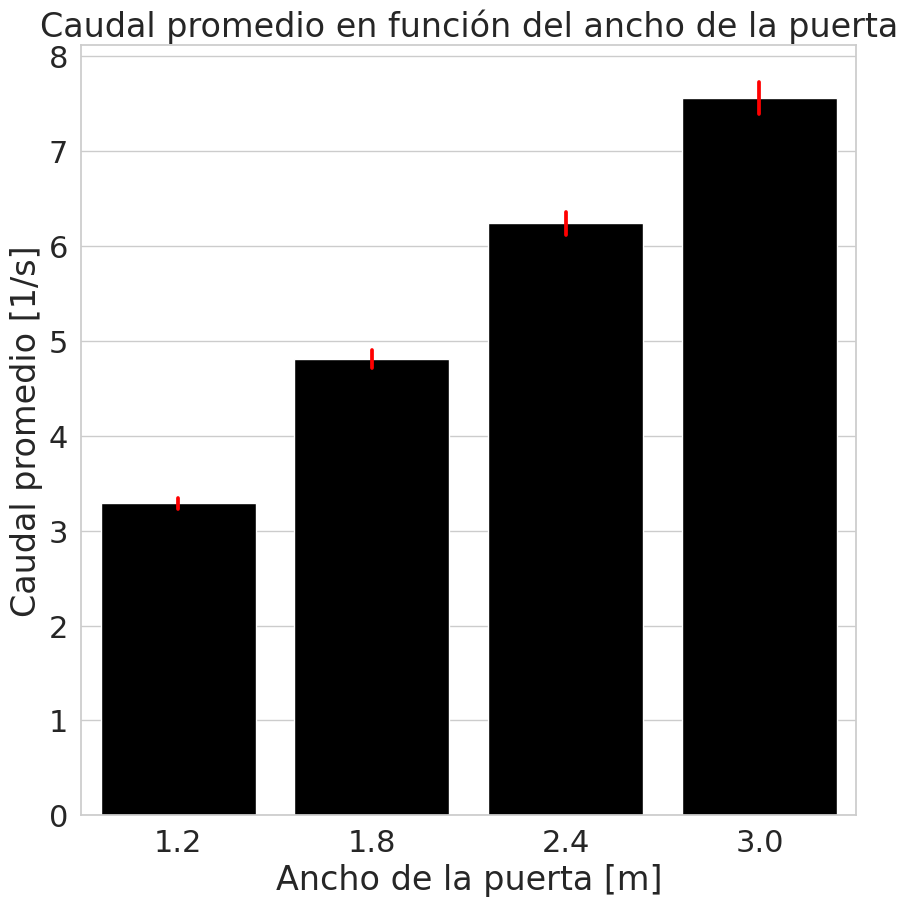

In [21]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='d', y='Q', data=mean_simulation_b, color='black', errcolor='red')

# Configurar las etiquetas del gráfico
plt.xlabel('Ancho de la puerta [m]')
plt.ylabel('Caudal promedio [1/s]')
plt.title('Caudal promedio en función del ancho de la puerta')

# Mostrar el gráfico
plt.show()

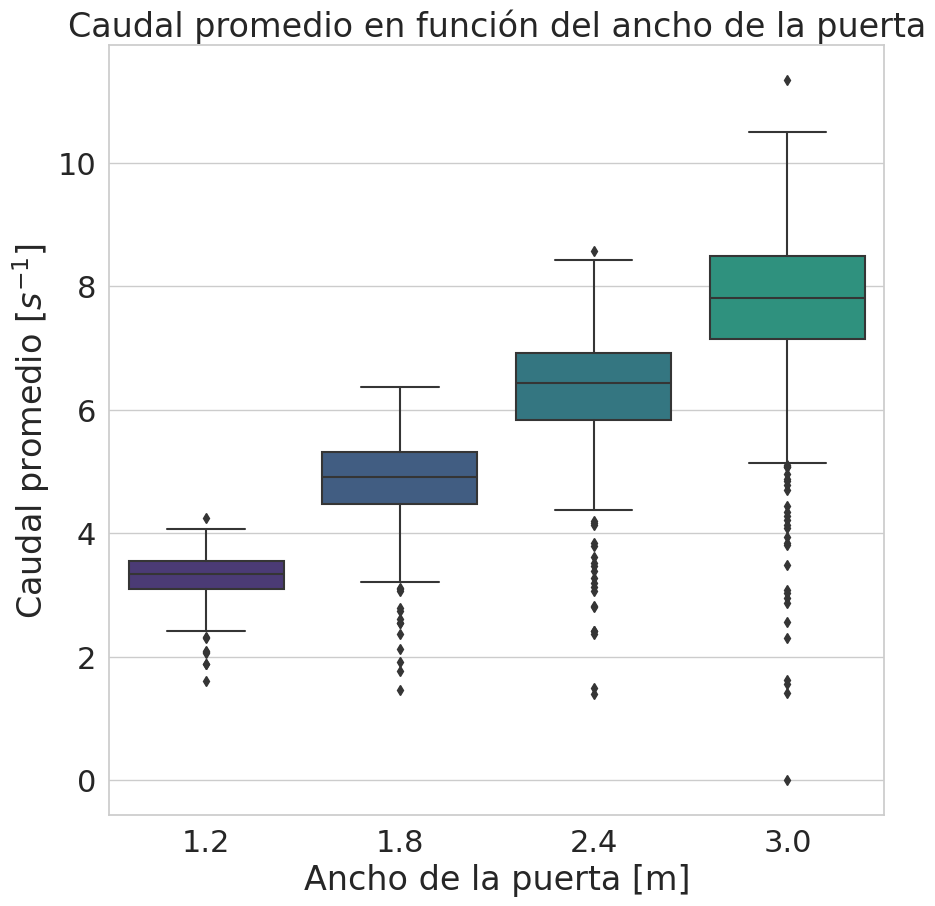

In [22]:
# Ajustar los datos para que el caudal sea siempre positivo
adjusted_data = np.maximum(mean_simulation_b['Q'], 0)

# Crear el boxplot utilizando Seaborn
sns.boxplot(x='d', y=adjusted_data, data=mean_simulation_b)

# Configurar las etiquetas del gráfico
plt.xlabel('Ancho de la puerta [m]')
plt.ylabel('Caudal promedio [$s^{-1}$]')
plt.title('Caudal promedio en función del ancho de la puerta')

# plt.ylim(-1, 25)

# Mostrar el gráfico
plt.show()


In [51]:
mean_simulation_b2 = mean_simulation_b.copy()
# mean_simulation_b2['Q'] = mean_simulation_b2['Q'] / mean_simulation_b2['d']
data = mean_simulation_b2.groupby('d')['Q'].mean().reset_index()
data['min'] = mean_simulation_b2.groupby('d')['Q'].min().values
data['max'] = mean_simulation_b2.groupby('d')['Q'].max().values
data.head()

,d,Q,min,max
0,1.2,3.290050,1.599360,4.241782
1,1.8,4.808465,1.464129,6.359300
2,2.4,6.238979,1.389854,8.565310
3,3.0,7.558738,-2.844950,11.331445


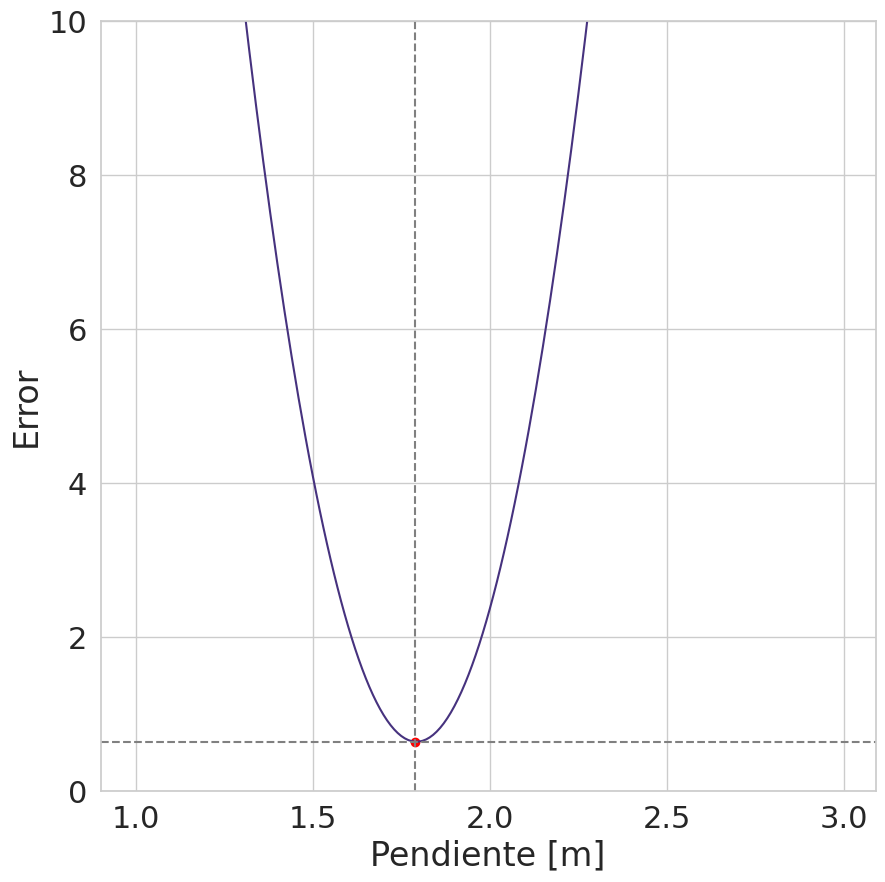

El mínimo error es: 0.6436602168461201
El valor de m asociado al mínimo error es: 1.7900000000000007


In [52]:
def linear_func(x, m, c):
    return m * x + c

def error_func(c):
    return np.sum((data.Q - linear_func(data.d, m, c)) ** 2)

m_values = np.arange(1, 3, 0.01)  # Valores de pendiente m

error_values = np.zeros_like(m_values)  # Almacenar los valores de error

for i, m in enumerate(m_values):
    error_values[i] = error_func(m)  # Calcula el error para cada valor de m

min_error = np.min(error_values)
min_error_index = np.argmin(error_values)
min_m = m_values[min_error_index]

# Gráfico de la curva de error con escala logarítmica en el eje y
plt.plot(m_values, error_values)
plt.scatter(min_m, min_error, color='red', label='Mínimo error')
plt.axhline(min_error, color='gray', linestyle='dashed')
plt.axvline(min_m, color='gray', linestyle='dashed')
plt.xlabel('Pendiente [m]')
plt.ylabel('Error')
plt.ylim(0, 10)
plt.grid(True)
plt.show()

print("El mínimo error es:", min_error)
print("El valor de m asociado al mínimo error es:", min_m)

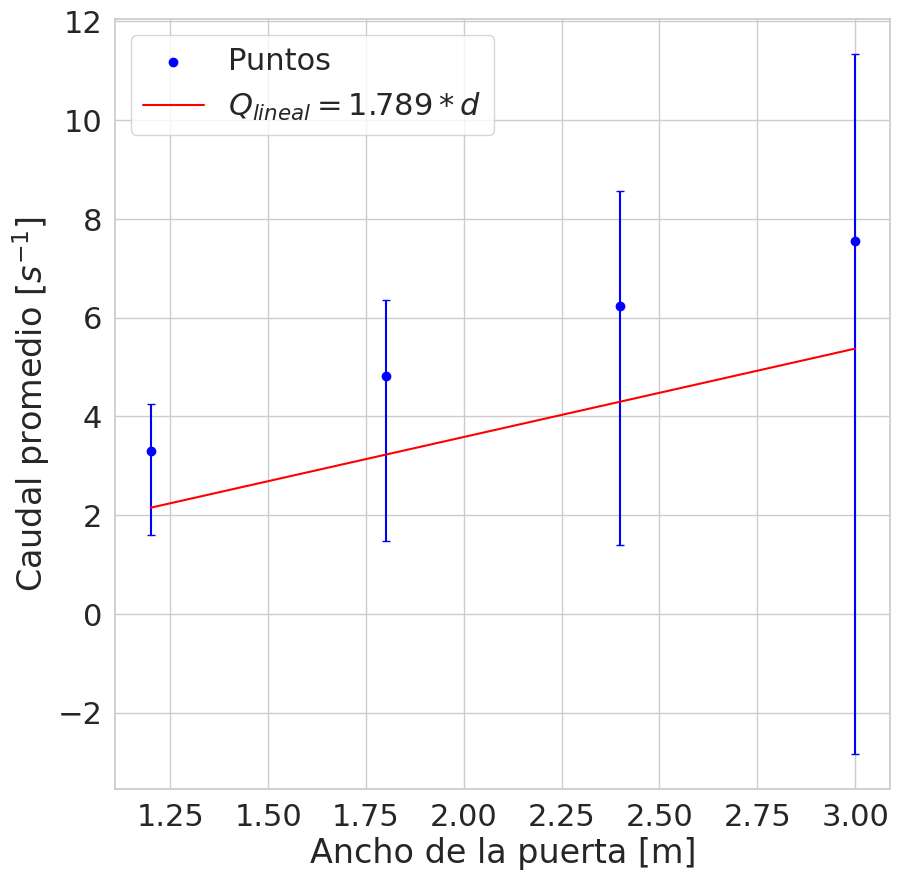

In [54]:
# Definición de la función lineal y = mx + c
def linear_func(x, m, c):
    return m * x + c

# Cálculo de la pendiente que minimiza el error
m = min_m

# Cálculo de los valores de y correspondientes a la función lineal
Q_linear = linear_func(data.d, m, 0)

# Gráfico de los puntos y la función lineal
plt.scatter(data.d, data.Q, color='blue', label='Puntos')
plt.errorbar(data.d, data.Q, yerr=[data.Q - data['min'], data['max'] - data.Q], fmt='none', color='blue', capsize=3)

Q_linear = linear_func(data.d, min_m, 0)
plt.plot(data.d, Q_linear, color='red', label='$Q_{lineal} = 1.789 * d$')

plt.xlabel('Ancho de la puerta [m]')
plt.ylabel('Caudal promedio [$s^{-1}$]')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:

mean_simulation_b2 = mean_simulation_b.copy()
mean_simulation_b2['Q'] = mean_simulation_b2['Q'] / mean_simulation_b2['d']

# Agregar la regresión lineal a los valores medios
ax=sns.regplot(x='d', y='Q', data=mean_simulation_b2.groupby('d')['Q'].mean().reset_index(), scatter=True)
# ax.set_xticklabels([str(x) for x in [1.2, 1.8, 2.4, 3.0]])
plt.ylim(0, 3)

# Configurar las etiquetas del gráfico
plt.xlabel('Ancho de la puerta [m]')
plt.ylabel('Caudal específico [$1/$ms]')
plt.title('Caudal específico en función del ancho de la puerta')
